In [ ]:
from tool import YearMonth, yearmonth_range
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

from env import ProEvoEnv

import os
import copy
import torch

In [ ]:
amino_acids_dict = {
    'A': 0,  # 丙氨酸
    'R': 1,  # 精氨酸
    'N': 2,  # 天門冬氨酸
    'D': 3,  # 天冬氨酸
    'C': 4,  # 半胱氨酸
    'E': 5,  # 谷氨酸
    'Q': 6,  # 谷氨酰胺
    'G': 7,  # 甘氨酸
    'H': 8,  # 組氨酸
    'I': 9,  # 異亮氨酸
    'L': 10, # 亮氨酸
    'K': 11, # 賴氨酸
    'M': 12, # 蛋氨酸
    'F': 13, # 苯丙氨酸
    'P': 14, # 脯氨酸
    'S': 15, # 絲氨酸
    'T': 16, # 蘇氨酸
    'W': 17, # 色氨酸
    'Y': 18, # 酪氨酸
    'V': 19, # 纈氨酸
    '': 20   # 空白字符
}

In [ ]:
def epsilon_greedy(q_values, epsilon):
    if np.random.random() < epsilon:
        return np.random.randint(len(q_values))
    else:
        return np.argmax(q_values)

In [ ]:
input_size_1 = int(1 + 1275 + 35 + 35)
hidden_size_1_1 = int(input_size_1 * 1.2)
hidden_size_1_2 = int(hidden_size_1_1 * 0.8)
hidden_size_1_3 = int(hidden_size_1_2 * 0.8)
output_size_1 = 1275
Qmodel_1 = torch.nn.Sequential(
    torch.nn.Linear(input_size_1, hidden_size_1_1),
    torch.nn.ReLU(),
    torch.nn.Linear(hidden_size_1_1, hidden_size_1_2),
    torch.nn.ReLU(),
    torch.nn.Linear(hidden_size_1_2, hidden_size_1_3),
    torch.nn.ReLU(),
    torch.nn.Linear(hidden_size_1_3, output_size_1)
)
loss_fn_1 = torch.nn.MSELoss()
optimizer_1 = torch.optim.Adam(Qmodel_1.parameters(), lr=1e-4)

Qmodel_1_t = copy.deepcopy(Qmodel_1)
Qmodel_1_t.load_state_dict(Qmodel_1.state_dict())


In [ ]:
input_size_2 = int(1 + 1275 + 35 + 35 + 1275)
hidden_size_2_1 = int(input_size_2 * 1.2)
hidden_size_2_2 = int(hidden_size_2_1 * 0.8)
hidden_size_2_3 = int(hidden_size_2_1 * 0.8)
output_size_2 = 20

Qmodel_2 = torch.nn.Sequential(
    torch.nn.Linear(input_size_2, hidden_size_2_1),
    torch.nn.ReLU(),
    torch.nn.Linear(hidden_size_2_1, hidden_size_2_2),
    torch.nn.ReLU(),
    torch.nn.Linear(hidden_size_2_2, hidden_size_2_3),
    torch.nn.ReLU(),
    torch.nn.Linear(hidden_size_2_3, output_size_2)
)
loss_fn_2 = torch.nn.MSELoss()
optimizer_2 = torch.optim.Adam(Qmodel_2.parameters(), lr=1e-4)

Qmodel_2_t = copy.deepcopy(Qmodel_2)
Qmodel_2_t.load_state_dict(Qmodel_2.state_dict())
    

In [ ]:
sequence_ref = 'MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDLFLPFFSNVTWFHAIHVSGTNGTKRFDNPVLPFNDGVYFASTEKSNIIRGWIFGTTLDSKTQSLLIVNNATNVVIKVCEFQFCNDPFLGVYYHKNNKSWMESEFRVYSSANNCTFEYVSQPFLMDLEGKQGNFKNLREFVFKNIDGYFKIYSKHTPINLVRDLPQGFSALEPLVDLPIGINITRFQTLLALHRSYLTPGDSSSGWTAGAAAYYVGYLQPRTFLLKYNENGTITDAVDCALDPLSETKCTLKSFTVEKGIYQTSNFRVQPTESIVRFPNITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYLYRLFRKSNLKPFERDISTEIYQAGSTPCNGVEGFNCYFPLQSYGFQPTNGVGYQPYRVVVLSFELLHAPATVCGPKKSTNLVKNKCVNFNFNGLTGTGVLTESNKKFLPFQQFGRDIADTTDAVRDPQTLEILDITPCSFGGVSVITPGTNTSNQVAVLYQDVNCTEVPVAIHADQLTPTWRVYSTGSNVFQTRAGCLIGAEHVNNSYECDIPIGAGICASYQTQTNSPRRARSVASQSIIAYTMSLGAENSVAYSNNSIAIPTNFTISVTTEILPVSMTKTSVDCTMYICGDSTECSNLLLQYGSFCTQLNRALTGIAVEQDKNTQEVFAQVKQIYKTPPIKDFGGFNFSQILPDPSKPSKRSFIEDLLFNKVTLADAGFIKQYGDCLGDIAARDLICAQKFNGLTVLPPLLTDEMIAQYTSALLAGTITSGWTFGAGAALQIPFAMQMAYRFNGIGVTQNVLYENQKLIANQFNSAIGKIQDSLSSTASALGKLQDVVNQNAQALNTLVKQLSSNFGAISSVLNDILSRLDKVEAEVQIDRLITGRLQSLQTYVTQQLIRAAEIRASANLAATKMSECVLGQSKRVDFCGKGYHLMSFPQSAPHGVVFLHVTYVPAQEKNFTTAPAICHDGKAHFPREGVFVSNGTHWFVTQRNFYEPQIITTDNTFVSGNCDVVIGIVNNTVYDPLQPELDSFKEELDKYFKNHTSPDVDLGDISGINASVVNIQKEIDRLNEVAKNLNESLIDLQELGKYEQYIKWPWYIWLGFIAGLIAIVMVTIMLCCMTSCCSCLKGCCSCGSCCKFDEDDSEPVLKGVKLHYT'
dataset = pd.read_csv('data/train_feature_header.csv')
TrainRange = [YearMonth(2019, 12), YearMonth(2021, 6)]

from collections import deque
epochs = 10000
gamma = 0.9
losses = []
mem_size = 100
batch_size = 5  # 先偵錯
replay = deque(maxlen=mem_size)
max_moves = 40
syn_freq_1 = 50
syn_freq_2 = 50
syn_freq_3 = 50
epsilon = 1.

for i in range(epochs):
    env = ProEvoEnv(sequence_ref ,dataset, TrainRange[0], TrainRange[1])
    state = env.state()
    seq = env.sequence_to_index()
    seq_len = len(seq)
    input1_ = np.concatenate([np.array([seq_len]), seq, state])
    input1 = torch.tensor(input1_, dtype=torch.float32)
    
    move = 0
    done = False
    status = 1
    while(status != 0):
        move += 1
        q1 = Qmodel_1(input1)
        q1_ = q1.detach().numpy()
        action1 = epsilon_greedy(q1_, epsilon)
        
        input2_ = np.concatenate([q1_, input1_])
        input2 = torch.tensor(input2_, dtype=torch.float32)
        q2 = Qmodel_2(input2)
        q2_ = q2.detach().numpy()
        action2 = epsilon_greedy(q2_, epsilon)
        
        env.mutate_sequence(2, action1, action2)
        reward,ld_min,next = env.get_reward()
        if next:
            done = env.go_next()
            
        
        print(i, move, ld_min, env.ym)
        
        state2 = env.state()
        input1_state2_ = np.concatenate([np.array([seq_len]), seq, state2])
        input1_state2 = torch.tensor(input1_state2_, dtype=torch.float32)
        
        
            
        exp = (input1, input2, action1, action2, reward, input1_state2, done )
        replay.append(exp)
        input1 = input1_state2
        
        if len(replay) > batch_size:
            minibatch = random.sample(replay, batch_size)
            
            input1_batch = torch.cat([i1.unsqueeze(0) for (i1, _, _, _, _, _, _, ) in minibatch])
            input2_batch = torch.cat([i2.unsqueeze(0) for (_, i2, _, _, _, _, _, ) in minibatch])
            
            action1_batch = torch.tensor([a1 for (_, _, a1, _, _, _, _,) in minibatch], dtype=torch.int64)
            action2_batch = torch.tensor([a2 for (_, _, _, a2, _, _, _,) in minibatch], dtype=torch.int64)
           
            reward_batch = torch.tensor([r for (_, _, _, _,  r, _, _) in minibatch], dtype=torch.float32)
            input1_state2_batch = torch.cat([i1_s2.unsqueeze(0) for (_, _, _, _, _, i1_s2, _) in minibatch])
            done_batch = torch.tensor([d for (_, _, _, _, _, _,  d) in minibatch], dtype=torch.bool)
            
            
            Q1 = Qmodel_1(input1_batch)
            Q2 = Qmodel_2(input2_batch)

            
            with torch.no_grad():
                Q1_t = Qmodel_1_t(input1_state2_batch)
                a1_state2_batch = torch.argmax(Q1_t, axis=1).unsqueeze(1)
                input2_state2_batch = torch.cat([Q1_t, input1_state2_batch], axis=1)
                Q2_t = Qmodel_2_t(input2_state2_batch)
                a2_state2_batch = torch.argmax(Q2_t, axis=1)
            
            Y1 = reward_batch + gamma * (~ done_batch) * torch.max(Q1_t, axis=1).values
            Y2 = reward_batch + gamma * (~ done_batch) * torch.max(Q2_t, axis=1).values

            X1 = Q1.gather(1, action1_batch.unsqueeze(1)).squeeze()
            X2 = Q2.gather(1, action2_batch.unsqueeze(1)).squeeze()

            loss1 = loss_fn_1(X1, Y1.detach())
            loss2 = loss_fn_2(X2, Y2.detach())

            print('訓練')
            print(i, loss1.item(), loss2.item())
            optimizer_1.zero_grad()
            loss1.backward()
            optimizer_1.step()
            optimizer_2.zero_grad()
            loss2.backward()
            optimizer_2.step()

            losses.append([loss1.item(), loss2.item()])
            
            if i % syn_freq_1 == 0:
                Qmodel_1_t.load_state_dict(Qmodel_1.state_dict())
            if i % syn_freq_2 == 0:
                Qmodel_2_t.load_state_dict(Qmodel_2.state_dict())

        
        
        if reward <= -3:
            status += 1
            if status == 4:
                status = 0
                move = 0
        
        if done or move > max_moves:
            status = 0
            move = 0
    if epsilon > 0.1:
        epsilon -= 1/epochs
losses = np.array(losses)
            
    
    


In [ ]:
# 畫loss, 三條畫在一起
ll = np.array(losses)
plt.plot(ll[:,0], label='loss1')
plt.plot(ll[:,1], label='loss2')

plt.legend()
plt.yscale('log')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title(f'epochs = {i}, train times = {len(ll)}')
plt.show()


In [ ]:
torch.save(Qmodel_1, f'Qmodel_1_{i}.pt')
torch.save(Qmodel_2, f'Qmodel_2_{i}.pt')

torch.save(Qmodel_1_t, f'Qmodel_1_t_{i}.pt')
torch.save(Qmodel_2_t, f'Qmodel_2_t_{i}.pt')


# 儲存losses
np.save('losses.npy', losses)

In [ ]:
epsilon

In [ ]:
# 用最後一個模型來測試
env = ProEvoEnv(sequence_ref ,dataset, TrainRange[0], TrainRange[1])
state = env.state()
seq = env.sequence_to_index()
seq_len = len(seq)
input1_ = np.concatenate([np.array([seq_len]), seq, state])
input1 = torch.tensor(input1_, dtype=torch.float32)
move = 0
done = False
status = 1

while(status != 0):
    move += 1
    q1 = Qmodel_1(input1)
    q1_ = q1.detach().numpy()
    action1 = epsilon_greedy(q1_, 0)
    # print(action1)
    
    input2_ = np.concatenate([q1_, input1_])
    input2 = torch.tensor(input2_, dtype=torch.float32)
    q2 = Qmodel_2(input2)
    q2_ = q2.detach().numpy()
    action2 = epsilon_greedy(q2_, 0)

    
    env.mutate_sequence(2, action1, action2)
    reward,ld_min,next = env.get_reward()
    if next:
        done = env.go_next()
    print(f'location: {action1},aminoac: {list(amino_acids_dict.keys())[action2]}')
    print(move, ld_min, env.ym)
    
    state2 = env.state()
    input1_state2_ = np.concatenate([np.array([seq_len]), seq, state2])
    input1_state2 = torch.tensor(input1_state2_, dtype=torch.float32)
    input1 = input1_state2
    
    if reward == -10:
        status += 1
        if status == 4:
            status = 0
            move = 0
    if done or move > max_moves:
        status = 0
        move = 0

In [ ]:
action2

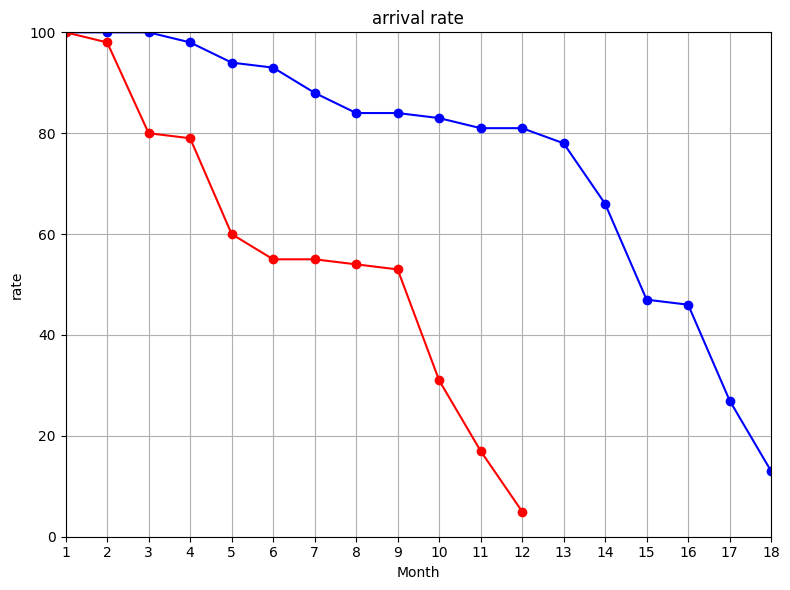

In [8]:
import matplotlib.pyplot as plt

# 數據
data = [100, 100, 100, 98, 94, 93, 88, 84, 84, 83, 81, 81, 78, 66, 47, 46, 27, 13]
data2 = [100, 98, 80, 79, 60, 55, 55, 54, 53, 31, 17, 5]

x = list(range(1, len(data) + 1))  # x軸坐標，從1到數據個數

# 繪圖
plt.figure(figsize=(8, 6))  # 設置圖片大小
plt.plot(x, data, marker='o', linestyle='-', color='b', label='Data')  # 繪製折線圖，使用圈標示點
plt.plot(x[:len(data2)], data2, marker='o', linestyle='-', color='r', label='Data2')  # 繪製折線圖，使用圈標示點
plt.xlabel('Month')  # x軸標籤
plt.ylabel('rate')  # y軸標籤
plt.title('arrival rate')  # 圖表標題
plt.grid(True)  # 顯示網格
plt.xlim(1,18)  # 設置x軸範圍
plt.ylim(0,100)  # 設置y軸範圍
plt.xticks(range(1, 19))  # 設置y軸刻度
plt.tight_layout()  # 自動調整子圖參數，以便填滿整個圖像區域
plt.show()  # 顯示圖表
